In [49]:
print ("hola")

hola


In [75]:
import numpy as np

In [76]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [92]:
x=np.linspace(0, 10, 500)
y=np.cumsum(np.random.randn(500,6),0)

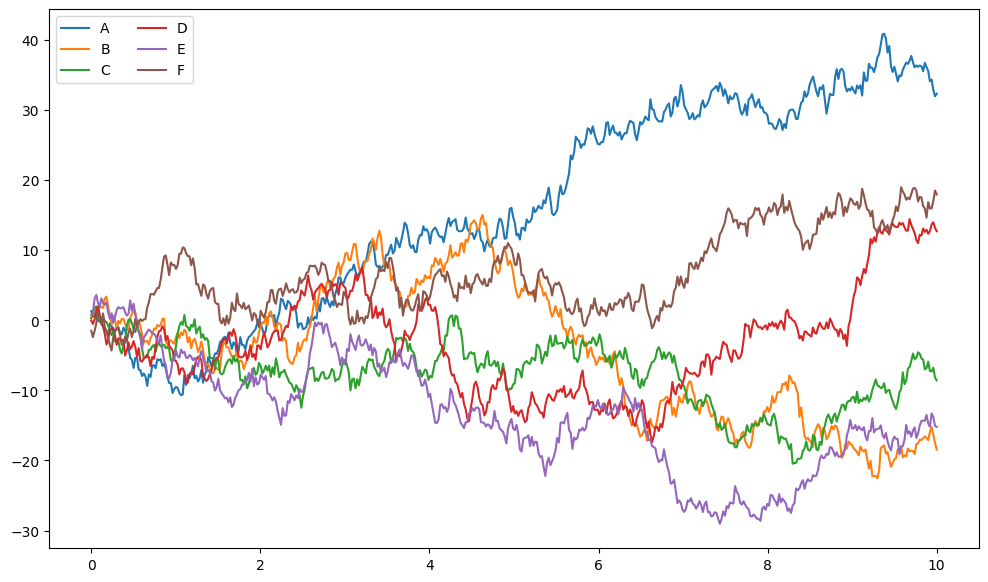

In [93]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc="upper left")

## CRYPTO EXCERCISE

In [3]:
import sys
sys.path.insert(0, '/home/oscar/py_envs/lib/python3.12/site-packages')

In [13]:
import pandas as pd

In [6]:
import requests

In [7]:
import time
time.sleep(1)  # 1-second delay

In [135]:
def get_historic_price(symbol, exchange="kraken", after="2018-09-01"):
    url=f"https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc"
    
    try:
        # Make the API request
        resp = requests.get(url, params={
            "periods": "3600",
            "after": str(int(pd.Timestamp(after).timestamp()))
        })

        # Check for HTTP errors (will raise an exception if status != 200)
        resp.raise_for_status()

        # Parse JSON data
        data=resp.json()

        # Create DataFrame
        df=pd.DataFrame(data["result"]["3600"], columns=[
            "CloseTime", "OpenPrice", "HighPrice", "LowPrice", "Volume", "NA"])
        df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
        df.set_index("CloseTime", inplace=True)
    
        return df

    except requests.exceptions.RequestException as e:
        print(f"❌ Request failed for {symbol.upper()} on {exchange}: {e}")
        return None
    except KeyError as e:
        print(f"❌ Invalid data format in API response: {e}")
        return None
    except ValueError as e:
        print(f"❌ JSON parsing error: {e}")
        return None

In [136]:
last_week = (pd.Timestamp.now() - pd.Timedelta(days=7))
last_week

Timestamp('2025-04-21 23:08:16.934112')

In [142]:
btc= get_historic_price("btc", "binance", after=last_week)

if btc is not None:
    print(btc.head())
else:
    print("Failed to fetch data")

❌ Request failed for BTC on binance: 410 Client Error: Gone for url: https://api.cryptowat.ch/markets/binance/btcusd/ohlc?periods=3600&after=1745276896
Failed to fetch data


In [138]:
eth= get_historic_price("eth", "bitstamp", after=last_week)

if eth is not None:
    print(eth.head())
else:
    print("Failed to fetch data")

❌ Request failed for ETH on bitstamp: 410 Client Error: Gone for url: https://api.cryptowat.ch/markets/bitstamp/ethusd/ohlc?periods=3600&after=1745276896
Failed to fetch data


## BTC

In [110]:
btc.head()

NameError: name 'btc' is not defined

In [ ]:
btc["ClosePrice"].plot(figsize=(15,7))

## ETH

In [ ]:
eth.head()

In [ ]:
eth["ClosePrice"].plot(figsize=(15,7)

# FOLLOWING SUBJECTS

### Bokeh
    -It's an interactive library that allows us to interact more with the graph than matplotlib

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label="Date"
p1.yaxis.axis_label="Price"

p1.line(btc.index, btc["ClosePrice"], color="#f2a900", legend="Bitcoin")
#p1.line(eth.index, eth["ClosePrice"], color="#A6CEE3", Legend="Ether")

p1.legend.location="top_left"

show(p1)

# EXCEL WRITER FROM WHAT WE HAVE DONE PREVIOUSLY

In [44]:
import pandas as pd

In [45]:
writer= pd.ExcelWriter("cryptos.xlsx", engine='openpyxl')

### we'll now write both our Bitcoin and Ether data as separate sheets:

In [ ]:
btc.to_excel(writer, sheet_name="Bitcoin")

In [ ]:
eth.to_excel(writer, sheet_name="Eth")

In [ ]:
writer.close()

# NumPy

In [5]:
import numpy as np

In [23]:
n=3

2**n=d
n=bits
d=decimals

In [24]:
2**n

8

8bits=1byte

In [25]:
2**32

4294967296

In [28]:
np.int8

numpy.int8

In [29]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [17]:
a=np.array([1,2,3,4,5,6])

In [26]:
b=np.array([0,1,2,2.5])

In [8]:
a[0], a[1]

(np.int64(1), np.int64(2))

In [9]:
a[1:3]

array([2, 3])

In [34]:
a[1:-1]

array([2, 3])

In [22]:
a[::2]

array([1, 3, 5])

In [31]:
b[0],b[2]

(np.float64(0.0), np.float64(2.0))

## How to Force a NumPy Array Output

In [29]:
b[[0,2,-1]]

array([0. , 2. , 2.5])

## Array types

In [32]:
a

array([1, 2, 3, 4, 5, 6])

In [34]:
a.dtype

dtype('int64')

In [41]:
np.array([1,2,3,4], dtype=float)

array([1., 2., 3., 4.])

**"np.float" was deprecated and insted use just "float"**

In [38]:
np.array([1,2,3,4], dtype=np.int8)

array([1, 2, 3, 4], dtype=int8)

# Unicode 

In [54]:
np.array(["a","b","cc"], dtype="<U1")

array(['a', 'b', 'c'], dtype='<U1')